In [57]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

sns.set = (
        rc = {'figfigure'})


In [23]:
picture = pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_1.csv')

In [24]:
picture.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [25]:
picture.groupby('group').count()

,id,events
group,,
A,10000,10000
B,10000,10000
C,10000,10000


In [26]:
button = pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_2.csv')

In [27]:
button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [9]:
#test Levene for homogeneity p > 0.05 means you don't reject H0
stats.levene(button.query('group == "A"').events, button.query('group == "B"').events, button.query('group == "C"').events )

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

<AxesSubplot:>

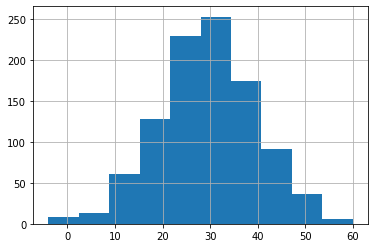

In [10]:
button[button['group'] == 'A'].events.sample(1000, random_state=17).hist() 

#shapiro_wilk test for normal distribution

<AxesSubplot:>

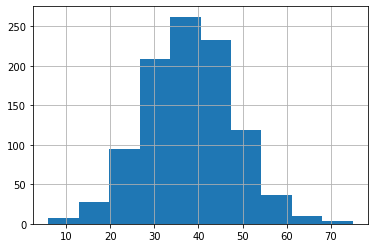

In [14]:
button[button['group'] == 'B'].events.sample(1000, random_state=17).hist() 

<AxesSubplot:>

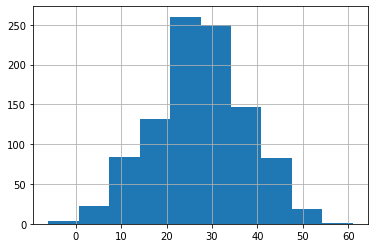

In [15]:
button[button['group'] == 'C'].events.sample(1000, random_state=17).hist() 

In [18]:
stats.f_oneway(button.query('group == "A"').events, button.query('group == "B"').events, button.query('group == "C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [21]:
print(pairwise_tukeyhsd(button.events, button.group))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


<AxesSubplot:>

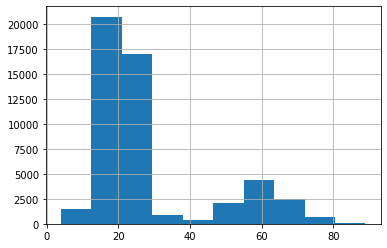

In [30]:
button[button['group'] == 'control'].events.hist()

<AxesSubplot:>

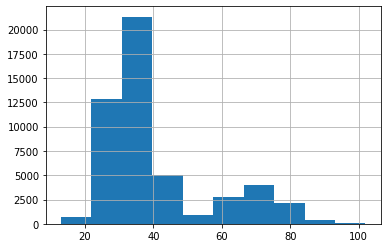

In [31]:
button[button['group'] == 'test'].events.hist()

In [32]:
button.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [37]:
button.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [41]:
button['combination'] = button.group + ' \ ' + button['segment']

In [42]:
button

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [38]:
np.round(7.805347, 2)

7.81

In [45]:
model = smf.ols(formula='events ~ group + segment + segment:group', data = button).fit()

In [52]:
np.round(sm.stats.anova_lm(model, type=2), 2)

,df,sum_sq,mean_sq,F,PR(>F)
group,1.0,3837195.41,3837195.41,112031.86,0.0
segment,1.0,23624796.65,23624796.65,689756.38,0.0
segment:group,1.0,36642.44,36642.44,1069.82,0.0
Residual,99996.0,3424955.89,34.25,NaN,NaN


In [56]:
print((pairwise_tukeyhsd(button.events, button.combination)).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


<AxesSubplot:xlabel='group', ylabel='events'>

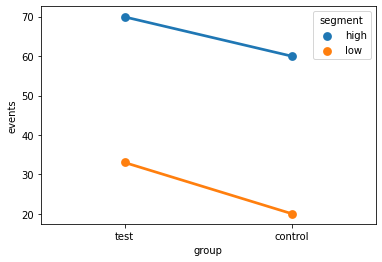

In [58]:
sns.pointplot(x='group', y='events', hue='segment', data=button)

In [8]:
hs_grad = 62

In [9]:
povery = 64.78 - 0.62 * hs_grad


In [10]:
round(povery, 2)

26.34

In [ ]:
cost

In [ ]:
receipts = 7.68 + 3.66*cost + 7.62*promotion + 0.82*books